Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

Load the dataset

In [2]:
data=pd.read_csv("bank-full.csv",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Number of Rows and Columns

In [4]:
data.shape

(45211, 17)

Getting Some information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Checking the number of missing values in each columns

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in the dataset

### JOB

### Exploratory Data Analysis

In [7]:
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='count'>

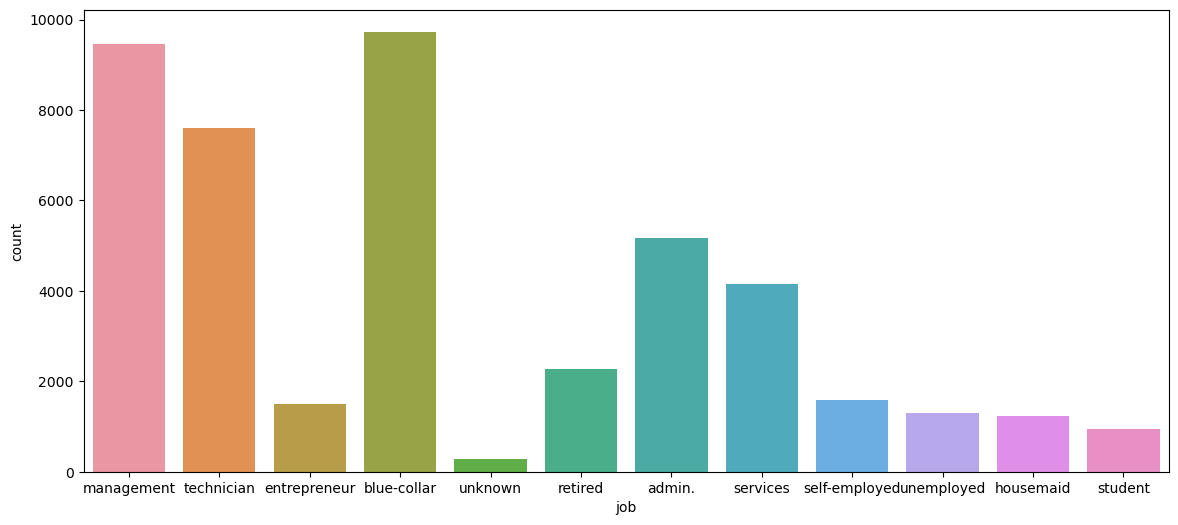

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(x=data["job"],data=data)

<Axes: xlabel='job', ylabel='count'>

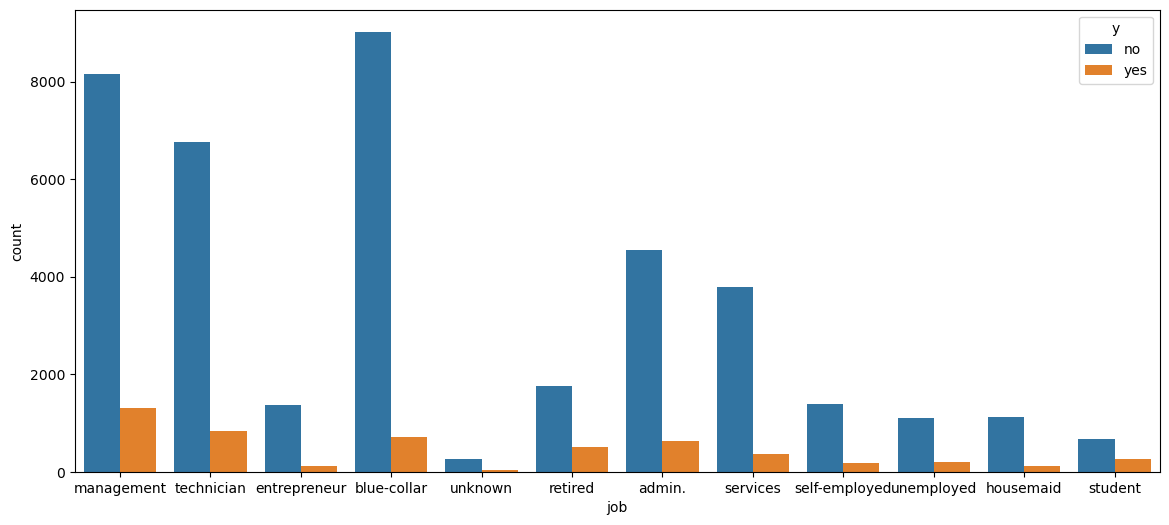

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x=data["job"],hue=data["y"],data=data)

### Age

In [10]:
data["age"].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

<Figure size 1400x600 with 0 Axes>

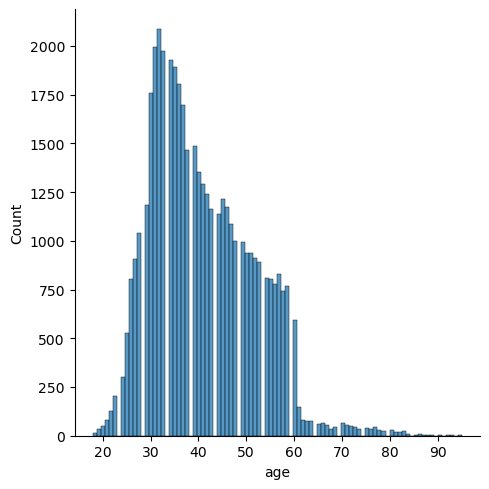

In [11]:
plt.figure(figsize=(14,6))
sns.displot(x=data["age"],data=data)

<Axes: xlabel='age'>

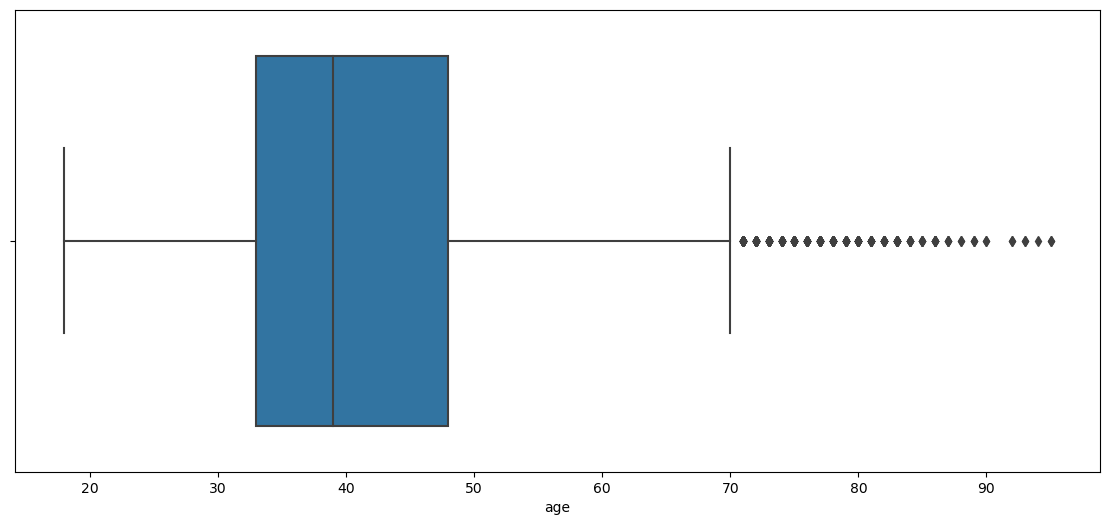

In [12]:
### outliers in Age column
plt.figure(figsize=(14,6))
sns.boxplot(x=data["age"])

### MARITAL

In [13]:
data["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

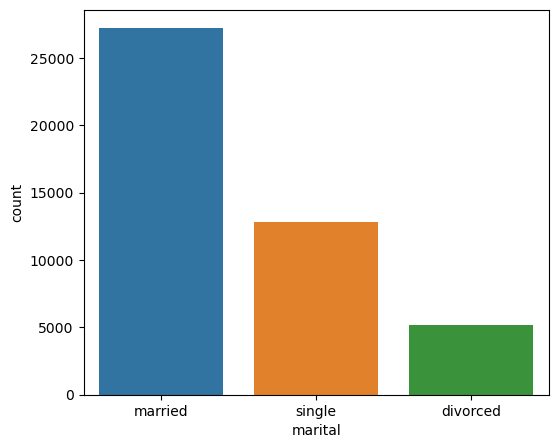

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x=data["marital"],data=data)

<Axes: xlabel='marital', ylabel='count'>

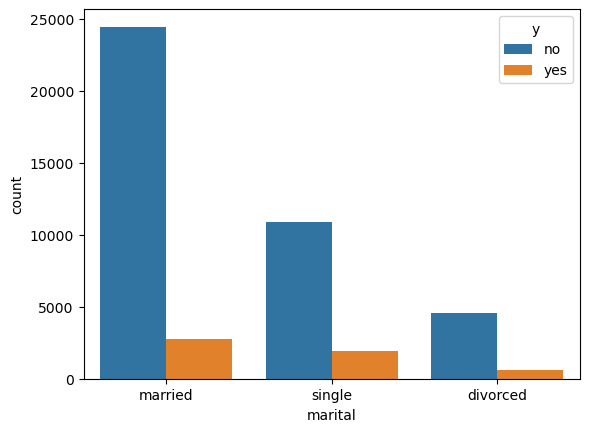

In [15]:
sns.countplot(x=data["marital"],hue=data["y"])

### EDUCATION

In [16]:
data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

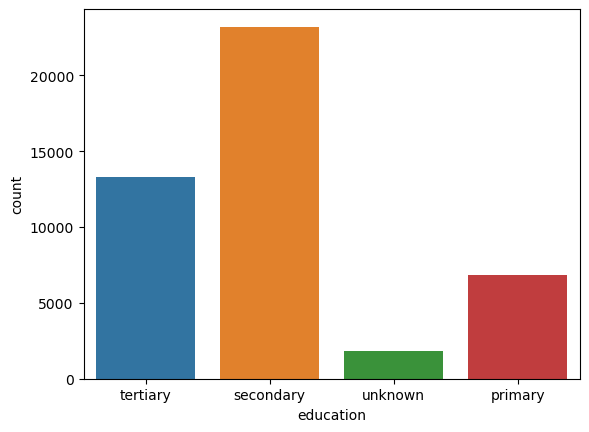

In [17]:
sns.countplot(x=data["education"],data=data)

<Axes: xlabel='education', ylabel='count'>

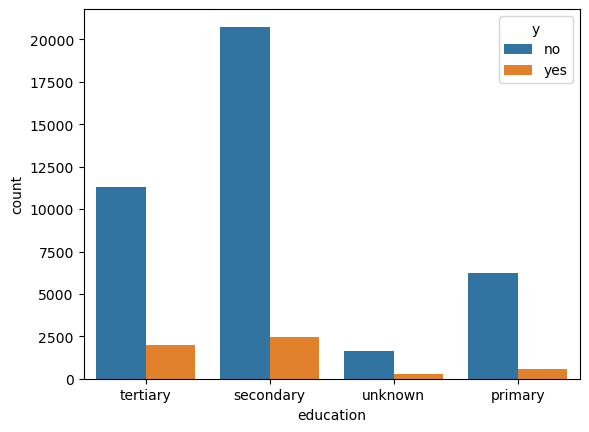

In [18]:
sns.countplot(x=data["education"],hue=data["y"])

### DEFAULT

In [19]:
data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

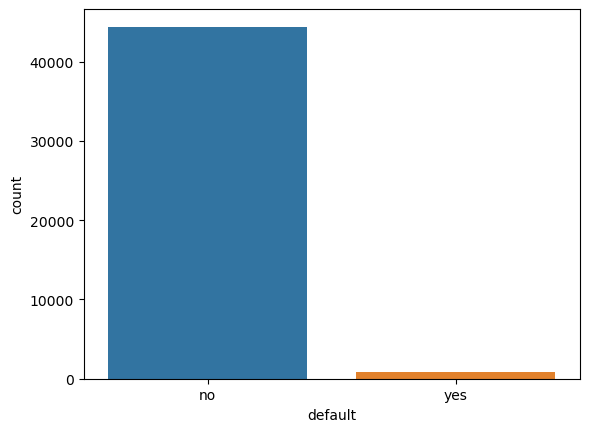

In [20]:
sns.countplot(x=data["default"],data=data)

<Axes: xlabel='default', ylabel='count'>

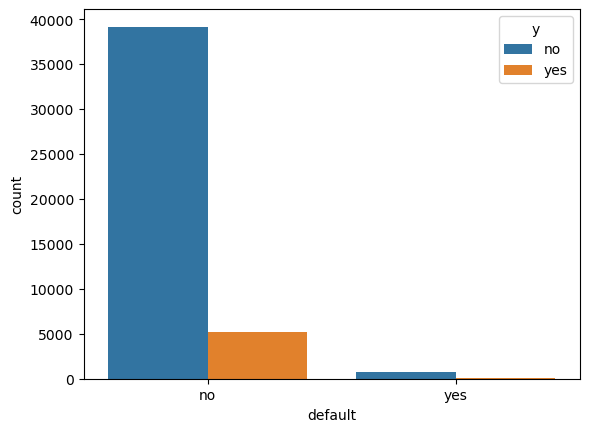

In [21]:
sns.countplot(x=data["default"],hue=data["y"])

### BALANCE

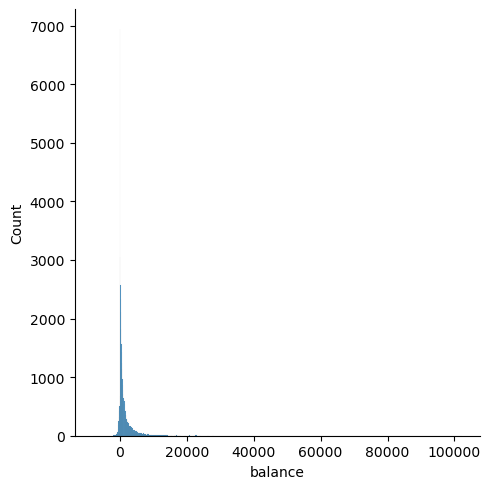

In [22]:
sns.displot(x=data["balance"],data=data)

<Axes: xlabel='balance'>

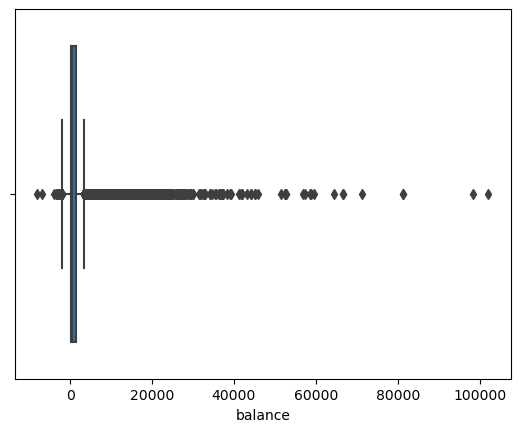

In [23]:
#### Outliers in the balance
sns.boxplot(x=data["balance"])

### HOUSING

In [24]:
data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

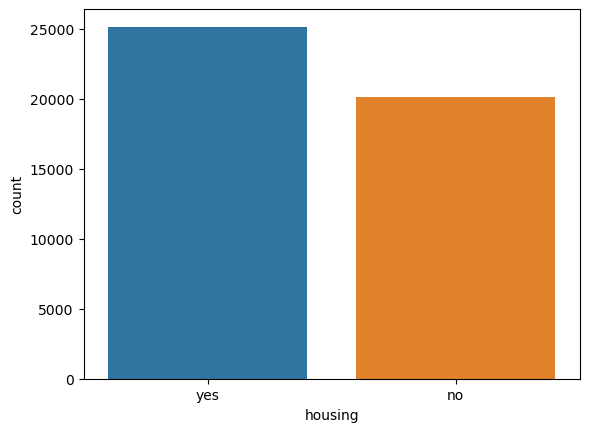

In [25]:
sns.countplot(x=data["housing"],data=data)

<Axes: xlabel='housing', ylabel='count'>

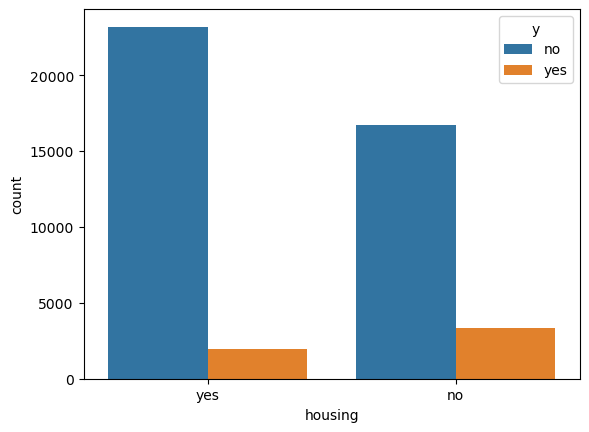

In [26]:
sns.countplot(x=data["housing"],hue=data["y"])

### LOAN

In [27]:
data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

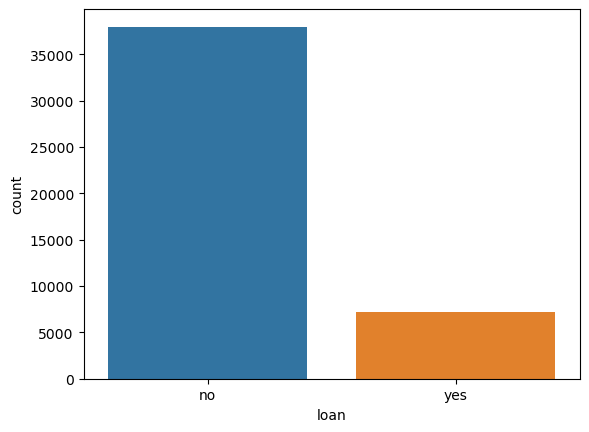

In [28]:
sns.countplot(x=data["loan"],data=data)

<Axes: xlabel='loan', ylabel='count'>

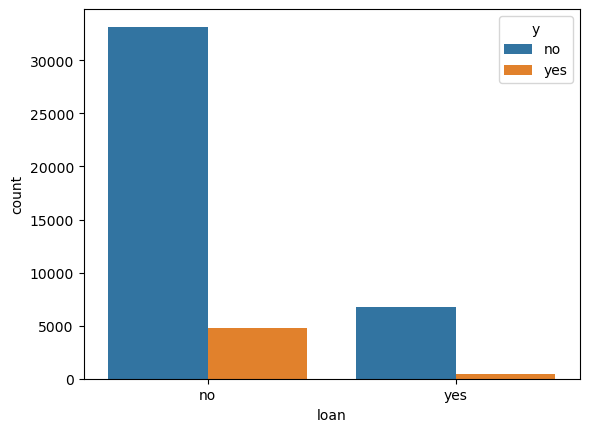

In [29]:
sns.countplot(x=data["loan"],hue=data["y"])

### CONTACT

In [30]:
data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

<Axes: xlabel='contact', ylabel='count'>

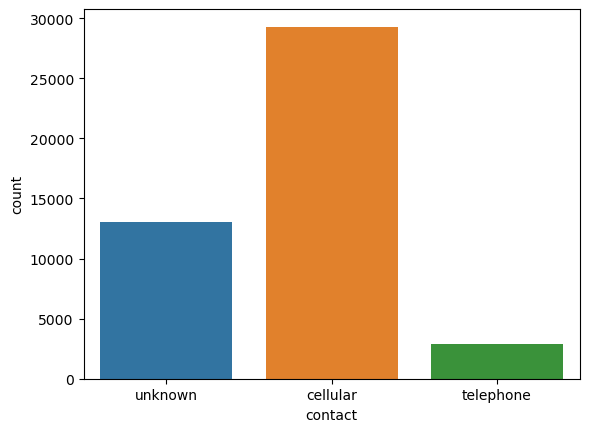

In [31]:
sns.countplot(x=data["contact"],data=data)

<Axes: xlabel='contact', ylabel='count'>

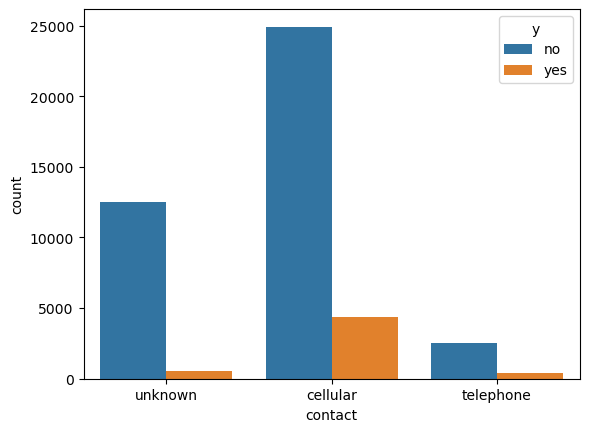

In [32]:
sns.countplot(x=data["contact"],hue=data["y"],data=data)

### DAY

<Axes: xlabel='day', ylabel='count'>

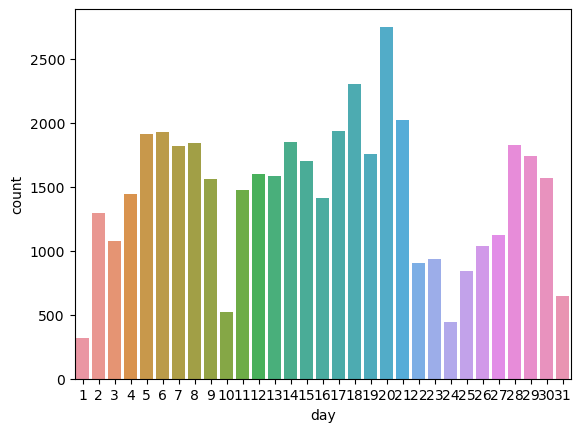

In [33]:
sns.countplot(x=data["day"],data=data)

<Axes: xlabel='day', ylabel='count'>

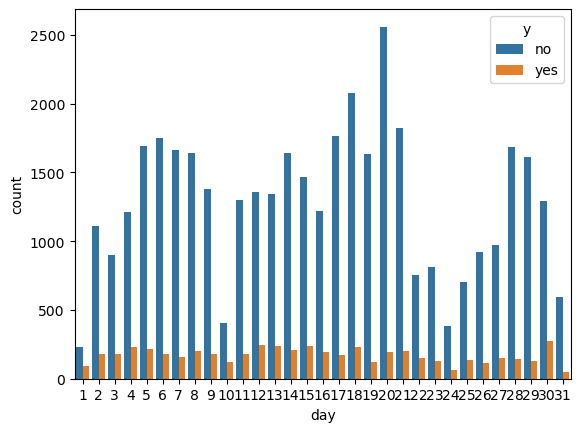

In [34]:
sns.countplot(x=data["day"],hue=data["y"],data=data)

### MONTH

<Axes: xlabel='month', ylabel='count'>

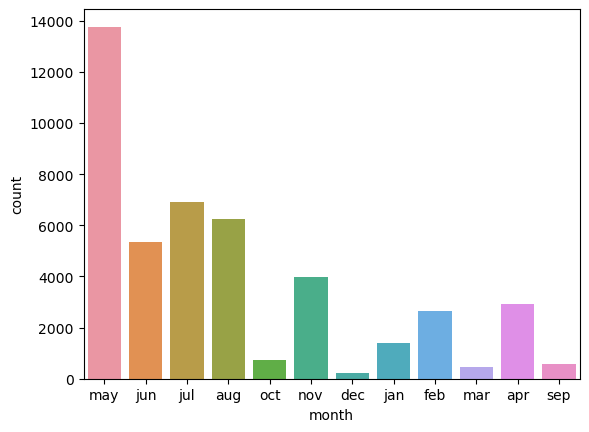

In [35]:
sns.countplot(x=data["month"],data=data)

<Axes: xlabel='month', ylabel='count'>

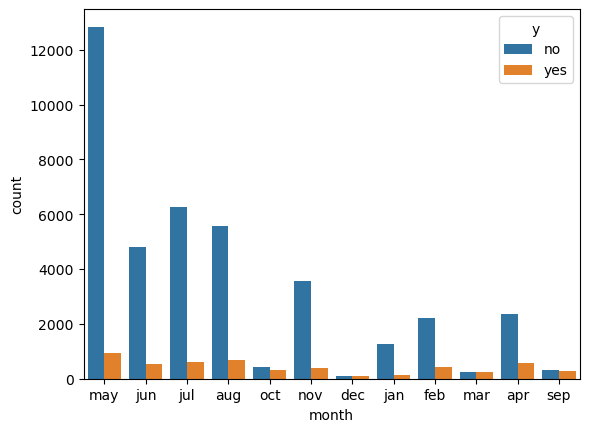

In [36]:
sns.countplot(x=data["month"],hue=data["y"],data=data)

### DURATION

In [37]:
data["duration"].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

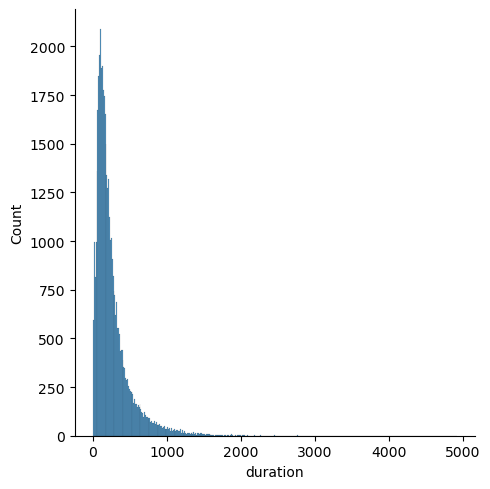

In [38]:
sns.displot(x=data["duration"],data=data)

<Axes: xlabel='duration'>

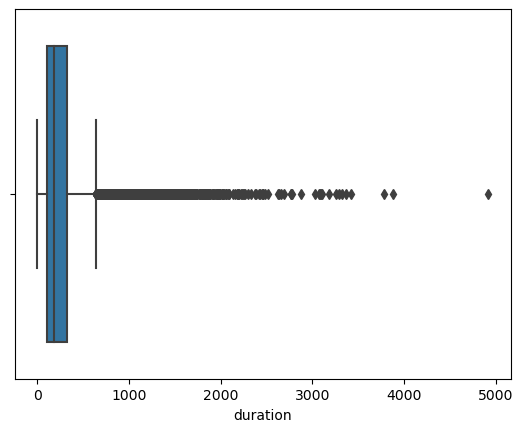

In [39]:
#### outliers in the duration
sns.boxplot(x=data["duration"])

### CAMPAIGN

In [40]:
data["campaign"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

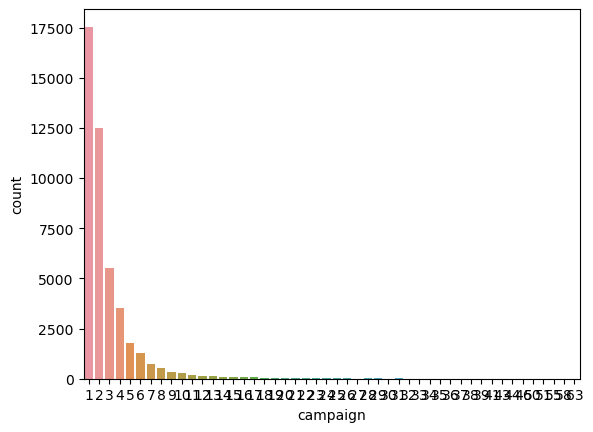

In [41]:
sns.countplot(x=data["campaign"],data=data)

<Axes: xlabel='campaign'>

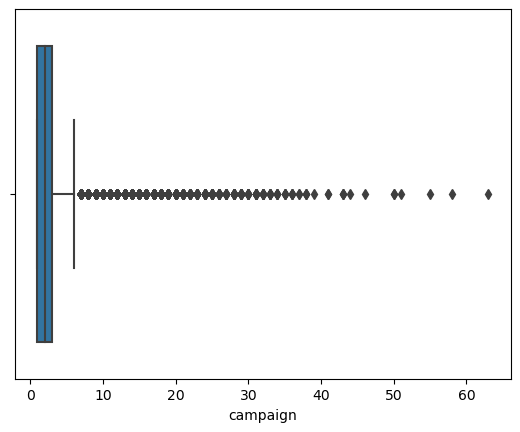

In [42]:
#### outliers in the campaigh
sns.boxplot(x=data["campaign"])

### PDAYS

In [43]:
data["pdays"].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

<Axes: xlabel='pdays'>

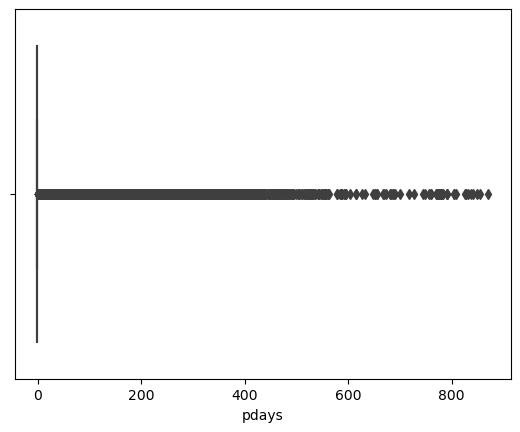

In [44]:
### outliers in the pdays
sns.boxplot(x=data["pdays"])

### PREVIOUS

In [45]:
data["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

<Axes: xlabel='previous'>

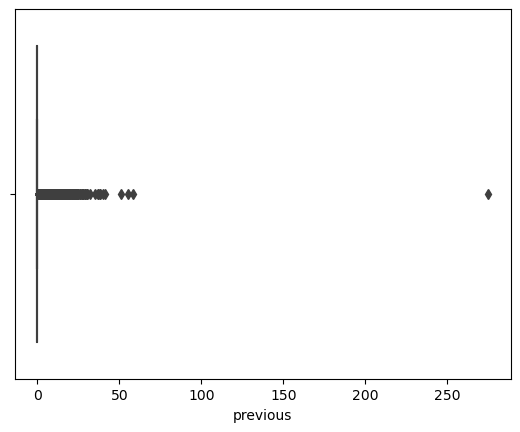

In [46]:
### Outliers in the Previous
sns.boxplot(x=data["previous"])

#### POUTCOME

In [47]:
data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

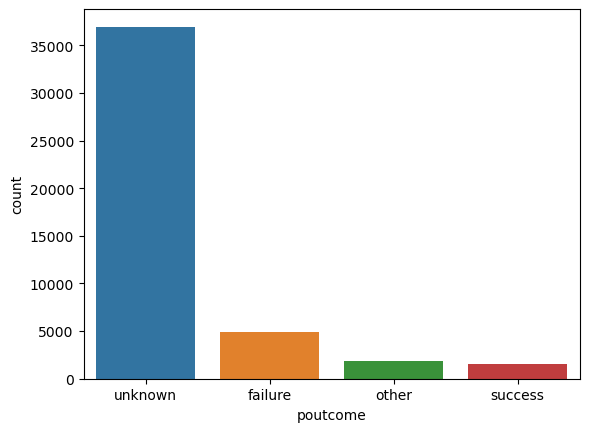

In [48]:
sns.countplot(x=data["poutcome"],data=data)

<Axes: xlabel='poutcome', ylabel='count'>

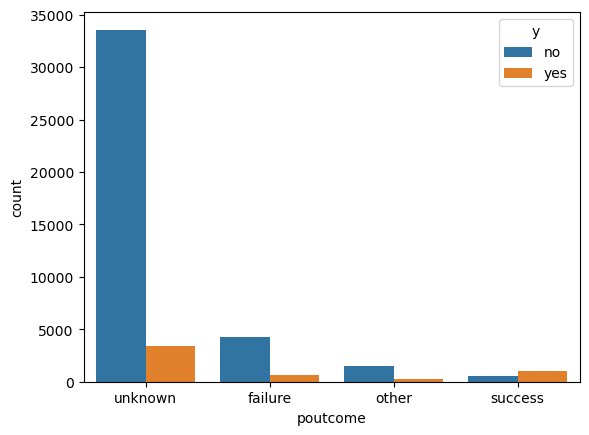

In [49]:
sns.countplot(x=data["poutcome"],hue=data["y"],data=data)

### TARGET  = Y

In [50]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

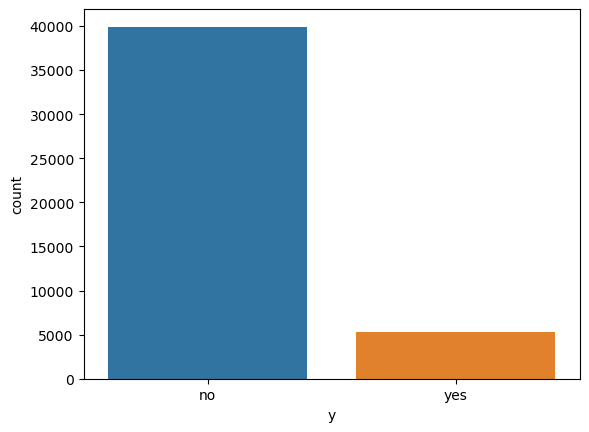

In [51]:
sns.countplot(x=data["y"],data=data)

### Handelling categorical columns

### Encode the Categorical column

In [52]:
labelencoder_x = LabelEncoder()
data["job"] = labelencoder_x.fit_transform(data["job"])
data["marital"] = labelencoder_x.fit_transform(data["marital"])
data["education"] = labelencoder_x.fit_transform(data["education"])
data["default"] = labelencoder_x.fit_transform(data["default"])
data["housing"] = labelencoder_x.fit_transform(data["housing"])
data["loan"] = labelencoder_x.fit_transform(data["loan"])
data["contact"] = labelencoder_x.fit_transform(data["contact"])
data["month"] = labelencoder_x.fit_transform(data["month"])
data["poutcome"] = labelencoder_x.fit_transform(data["poutcome"])
data["y"] = labelencoder_x.fit_transform(data["y"])

In [53]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


### Correlations

In [54]:
 data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


<Axes: >

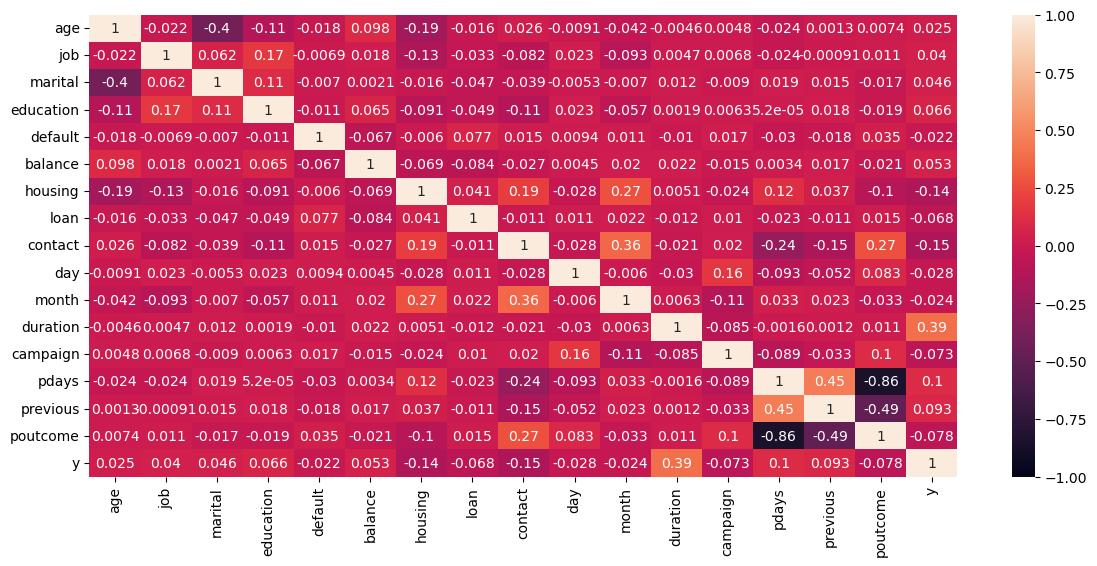

In [55]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True,vmin=-1)

### Modeling 

### Spliting the dataset into feature & target

In [56]:
x = data.drop(columns="y",axis=1)
y = data["y"]

In [57]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

### Spliting the into train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [60]:
print(x.shape,x_train.shape,x_test.shape)

(45211, 16) (36168, 16) (9043, 16)


In [67]:
model = LogisticRegression()
print("Model is Loaded")

Model is Loaded


In [69]:
model_fitted = model.fit(x_train,y_train)
print("Model is Trainned")

Model is Trainned


C:\Users\MD SUHAIL MALIK\Documents\Python Scripts\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
pred = model_fitted.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


In [71]:
pd.DataFrame({"Actual":y_test,"Predicted":pred})

,Actual,Predicted
7281,1,0
19469,0,0
31637,0,0
22484,0,0
35919,0,0
...,...,...
20374,1,0
24169,1,0
15737,0,0
18893,0,0


Checking the Accuracy of testing data

In [72]:
accuracy_score(pred,y_test)

0.8885325666261197

In [75]:
model_fitted.classes_

array([0, 1])

In [76]:
model_fitted.coef_

array([[-2.48203852e-02, -2.00474822e-02, -1.47830899e-01,
         2.57316505e-03, -1.04015665e-02,  4.31625520e-05,
        -3.63522880e-01, -1.09292960e-01, -3.50744652e-01,
        -1.84721383e-02,  7.77604870e-03,  3.85944509e-03,
        -3.30984631e-01, -8.44001577e-04,  7.43146942e-02,
        -2.90643087e-01]])

In [77]:
model_fitted.predict_proba(x_test)

array([[0.94430098, 0.05569902],
       [0.93427715, 0.06572285],
       [0.89573091, 0.10426909],
       ...,
       [0.94804092, 0.05195908],
       [0.9049016 , 0.0950984 ],
       [0.98636838, 0.01363162]])

In [82]:
cf = confusion_matrix(y_test,pred,labels=model_fitted.classes_)
cf

array([[7847,  139],
       [ 869,  188]], dtype=int64)

In [85]:
accuracy = (7847+188)/(7847+139+869+188)
accuracy

0.8885325666261197

In [87]:
error = (139+869)/(7847+139+869+188)
error

0.11146743337388035

tp = 188

tn = 7847

fp = 869

fn = 139
